![my_picture](https://www.fatalerrors.org/images/blog/c6b544ae87e97d71cb450e434a8818a6.jpg)

- apple width=6cm
- apple length=6cm
- banana width=4cm
- banana length=8cm

assume:
apple : 0

banana: 1

In [137]:
import numpy as np
import matplotlib.pyplot as plt

In [138]:
n=100
apple_width=np.random.normal(6,1,n)
apple_length=np.random.normal(6,1,n)
banana_width=np.random.normal(4,1,n)
banana_length=np.random.normal(8,1,n)

In [139]:
x_width=3
x_length=9

In [140]:
y_width=7
y_length=5

In [141]:
z_width=5
z_length=7

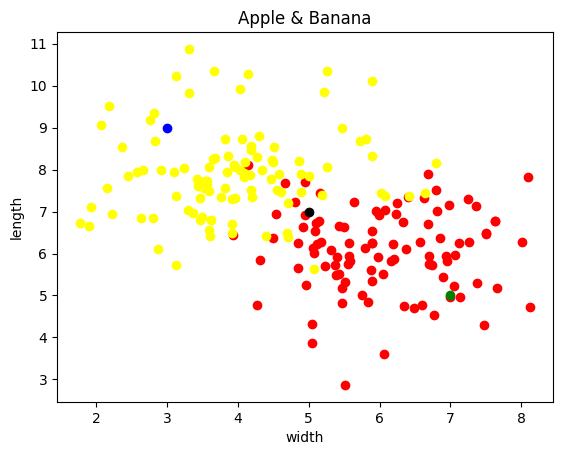

In [142]:
plt.scatter(apple_width,apple_length, color="red")
plt.scatter(banana_width,banana_length, color="yellow")
plt.scatter(x_width,x_length, color="blue", marker="o")
plt.scatter(y_width,y_length, color="green", marker="o")
plt.scatter(z_width,z_length, color="black", marker="o")
plt.title("Apple & Banana")
plt.xlabel("width")
plt.ylabel("length")
plt.show()

KNN: K Nearest Neighbors

In [143]:
width = np.concatenate((apple_width,banana_width))
length= np.concatenate((apple_length,banana_length))
X_train= np.array([width,length]).T
X_train.shape
# X_train

(200, 2)

In [144]:
Y_apples=np.zeros(n,dtype='int')
Y_bananas=np.ones(n,dtype='int')
Y_train=np.concatenate((Y_apples,Y_bananas))
Y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [145]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [146]:
a=np.array([4,5])
b=np.array([10,2])
euclidean_distance(a,b)

6.708203932499369

In [147]:
new_fruit=np.array([3,8.4])
distances=[]
for i in X_train:
    d=euclidean_distance(new_fruit,i)
    distances.append(d)

distances

[3.4414001181429095,
 3.6864254044883595,
 3.968927011294532,
 3.8754416294324368,
 5.441961963202843,
 4.575379046672745,
 4.440680316042718,
 4.884319658413007,
 4.542980634422014,
 2.4478853460569328,
 4.7373771593459715,
 3.277408726328212,
 3.6451273696692876,
 2.0637546319698,
 2.1584399427793213,
 2.176273509477868,
 5.39635611012079,
 3.716942023857019,
 3.501941759105327,
 3.3053469283329453,
 3.85631879618935,
 2.6902220345434817,
 5.149903743103016,
 3.4345886649365625,
 3.0400514534662375,
 3.5680808138431632,
 4.647007516566971,
 2.5162579133134635,
 6.304604305696505,
 4.047915975089773,
 2.7930953170195365,
 4.201200578890325,
 4.598034707694206,
 4.162865438341281,
 6.075032666620983,
 3.560683616122299,
 4.3604767397463124,
 1.8219983208726407,
 4.198109635445269,
 5.359004362067166,
 2.8385071343487462,
 3.6004289422507436,
 5.264790223025642,
 2.8855859955190195,
 2.6864553799078164,
 3.5973395940119484,
 4.906671548203752,
 2.607442425436065,
 4.725991736579431,
 4.

In [148]:
k=7
sort_distances=np.sort(distances)
sort_distances

array([0.33297375, 0.40643021, 0.43289838, 0.46836748, 0.52606737,
       0.61451029, 0.64982261, 0.66589693, 0.68263137, 0.68992773,
       0.74770539, 0.78786221, 0.81977244, 0.85135939, 0.86532877,
       0.88253452, 0.88863403, 0.90056212, 0.94892959, 0.96175731,
       0.9707002 , 0.98325215, 0.99749453, 1.0232646 , 1.04771841,
       1.09024282, 1.10636467, 1.10857563, 1.12614739, 1.14637699,
       1.1721562 , 1.17357459, 1.17509666, 1.18234405, 1.18720407,
       1.19153344, 1.19854703, 1.22908071, 1.27193132, 1.28311708,
       1.30440006, 1.358421  , 1.38740529, 1.39689532, 1.40409548,
       1.42472168, 1.44293837, 1.4652665 , 1.47218146, 1.4751456 ,
       1.49386145, 1.50640554, 1.51041054, 1.56036097, 1.58604951,
       1.58779822, 1.58934362, 1.60141753, 1.64446376, 1.65471663,
       1.66123566, 1.67323259, 1.71250048, 1.79678047, 1.82199832,
       1.82708629, 1.83379263, 1.85997779, 1.86527639, 1.92077688,
       1.92861765, 1.95126721, 2.06375463, 2.06983728, 2.07005

In [149]:
nearest_neighbors=np.argsort(distances)[0:k]
nearest_neighbors

array([107, 147, 174, 196, 151, 162, 123], dtype=int64)

In [150]:
Y_train[nearest_neighbors]

array([1, 1, 1, 1, 1, 1, 1])

In [151]:
result=np.bincount(Y_train[nearest_neighbors])
result

array([0, 7], dtype=int64)

In [152]:
# np.max(result)
if np.argmax(result)==0:
    print("🍎")
elif np.argmax(result)==1:
    print("🍌")

🍌
